In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Рисуем график $x^2-y^2$

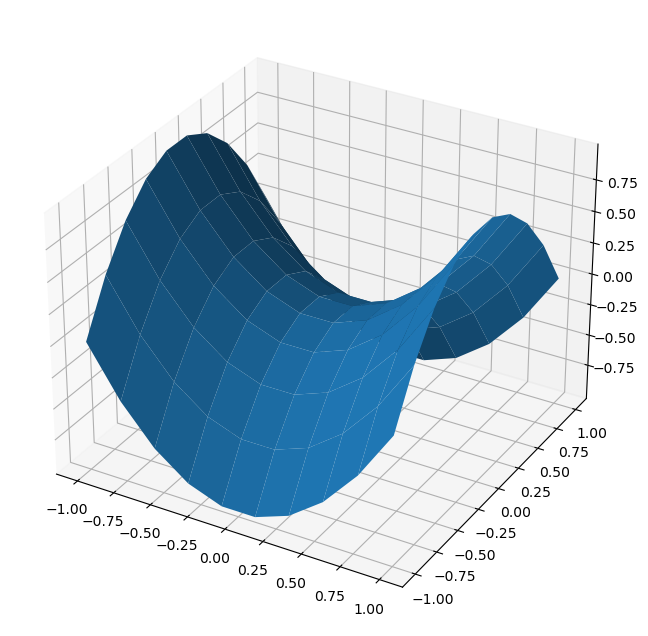

In [4]:
z = np.array([])
for i in range(N):
    for j in range(N):
        z = np.append(z, xs[i] ** 2 - ys[j] ** 2)

xgrid1 = np.tile(xs, (N, 1))
ygrid1 = np.tile(ys.reshape((N, 1)), (1, N))
zgrid = z.reshape((N, N)).T
fig = plt.figure(figsize=(14, 8))
ax_3d = fig.add_subplot(projection='3d')
ax_3d.plot_surface(xgrid, ygrid, zgrid)
# ax_3d.set_xlabel('x')
# ax_3d.set_ylabel('y')
# ax_3d.set_zlabel('z')
# ax_3d.set_title('$z = x^2 - y^2$')

Text(0.5, 0.92, '$z = x^2 - y^2$')

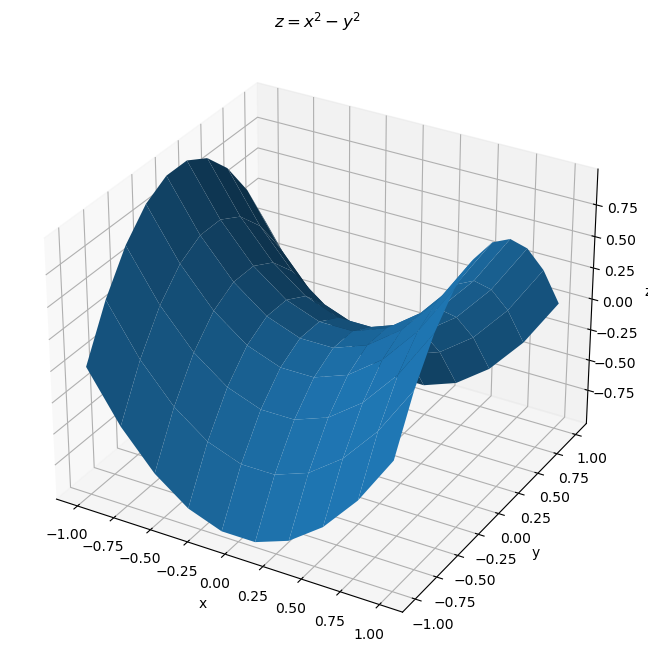

In [5]:
N = 10
xs = np.linspace(-1, 1, N)
ys = np.linspace(-1, 1, N)
xgrid, ygrid = np.meshgrid(xs, ys)
zgrid = xgrid ** 2 - ygrid ** 2
fig = plt.figure(figsize=(14, 8))
ax_3d = fig.add_subplot(projection='3d')
ax_3d.plot_surface(xgrid, ygrid, zgrid)
ax_3d.set_xlabel('x')
ax_3d.set_ylabel('y')
ax_3d.set_zlabel('z')
ax_3d.set_title('$z = x^2 - y^2$')

Рисуем граничные условия

Text(0.5, 1.0, 'x = 1')

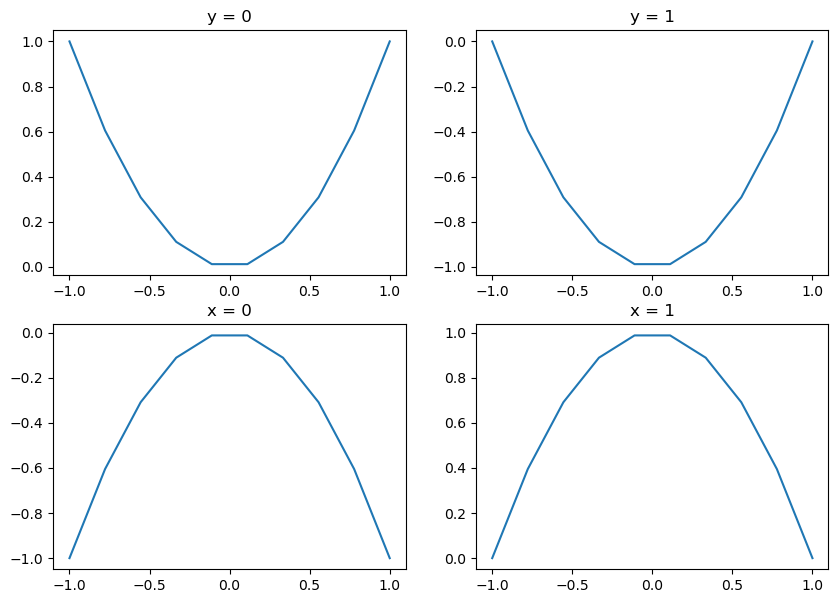

In [3]:
z_y0 = xs ** 2
z_y1 = xs ** 2 - 1
z_x0 = - ys ** 2
z_x1 = 1 - ys ** 2

fig, ax = plt.subplots(2, 2, figsize=(10, 7))
ax[0, 0].plot(xs, z_y0)
ax[0, 0].set_title('y = 0')
ax[0, 1].plot(xs, z_y1)
ax[0, 1].set_title('y = 1')
ax[1, 0].plot(ys, z_x0)
ax[1, 0].set_title('x = 0')
ax[1, 1].plot(ys, z_x1)
ax[1, 1].set_title('x = 1')

Численно решим задачу $ \Delta \ z = 0$ с краевыми условиями выше и сравним норму разности точного и приближенного решения при разных N.

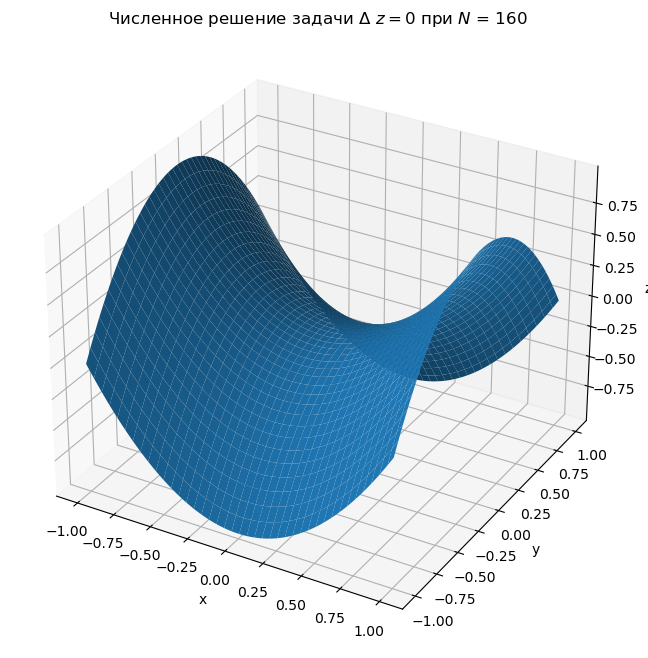

In [6]:
N_array = np.array([10, 20, 40, 80, 160])
norm1 = np.array([])
norm2 = np.array([])

for N in N_array:
    
    xs = np.linspace(-1, 1, N)
    ys = np.linspace(-1, 1, N)
    # сетка
    xgrid, ygrid = np.meshgrid(xs, ys)
    # точное решение
    u = xgrid ** 2 - ygrid ** 2
    # первое приближение
    u0 = np.copy(u)
    u0[1:-1, 1:-1] = 0
    # второе приближение
    u1 = np.copy(u0)
    u1[1:N-1, 1:N-1] = 1 / 4 * (u0[2:N, 1:N-1] + u0[0:N-2, 1:N-1] + u0[1:N-1, 2:N] + u0[1:N-1, 0:N-2])
    # последующие приближения
    while (
        np.linalg.norm(u - u1) > 0.001):
        u0 = u1
        u1[1:N-1, 1:N-1] = 1 / 4 * (u0[2:N, 1:N-1] + u0[0:N-2, 1:N-1] + u0[1:N-1, 2:N] + u0[1:N-1, 0:N-2])
    norm1 = np.append(norm1, np.linalg.norm(u - u1, np.inf) / np.linalg.norm(u, np.inf))
    norm2 = np.append(norm2, np.linalg.norm(u - u1) / np.linalg.norm(u))

fig = plt.figure(figsize=(14, 8))
ax_3d = fig.add_subplot(projection='3d')
ax_3d.plot_surface(xgrid, ygrid, u1) 
ax_3d.set_xlabel('x')
ax_3d.set_ylabel('y')
ax_3d.set_zlabel('z')
ax_3d.set_title(f'Численное решение задачи $ \Delta \ z = 0$ при $N$ = {N_array[-1]}')
plt.show()
# print('Норма разности точного и приближенного решений для разных сеток (N):')
# for i in range(len(N_array)):
#     print('N =', N_array[i], norm[i])

In [7]:
u1

array([[ 0.        , -0.02499901, -0.04968158, ..., -0.04968158,
        -0.02499901,  0.        ],
       [ 0.02499901,  0.        , -0.02468257, ..., -0.02468257,
         0.        ,  0.02499901],
       [ 0.04968158,  0.02468257,  0.        , ...,  0.        ,
         0.02468257,  0.04968158],
       ...,
       [ 0.04968158,  0.02468257,  0.        , ...,  0.        ,
         0.02468257,  0.04968158],
       [ 0.02499901,  0.        , -0.02468257, ..., -0.02468257,
         0.        ,  0.02499901],
       [ 0.        , -0.02499901, -0.04968158, ..., -0.04968158,
        -0.02499901,  0.        ]])

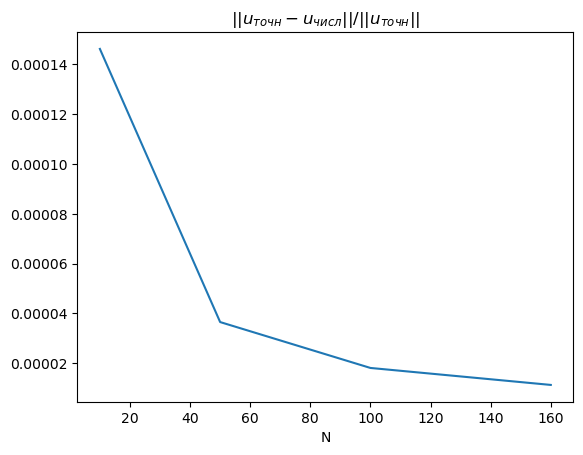

In [6]:
# через максмум по строкам
plt.plot(N_array, norm1)
plt.title('$ ||u_{точн} - u_{числ}||/||u_{точн}|| $')
plt.xlabel('N')
plt.show()

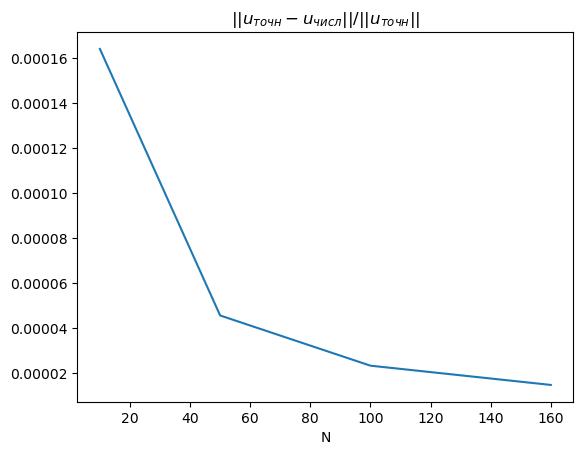

In [7]:
# через корни
plt.plot(N_array, norm2)
plt.title('$ ||u_{точн} - u_{числ}||/||u_{точн}|| $')
plt.xlabel('N')
plt.show()

In [35]:
diff1 = norm1[:-1] / norm1[1:]
diff2 = norm2[:-1] / norm2[1:]
print(diff1)
print(diff2)

[1.58940244 2.01504528 2.00899394 2.00699389]
[1.52691407 1.91374611 1.94571644 1.97234617]
